In [2]:
# if run on collab
# !git clone https://github.com/OLavrik/hse_topic.git
#!git pull

fatal: destination path 'hse_topic' already exists and is not an empty directory.


In [3]:
%cd hse_topic

/content/hse_topic


In [4]:
!pip install contextualized_topic_models

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
!bash load.sh

--2021-12-07 17:40:56--  https://voudy-data.s3.eu-north-1.amazonaws.com/pycharm_issues.json
Resolving voudy-data.s3.eu-north-1.amazonaws.com (voudy-data.s3.eu-north-1.amazonaws.com)... 52.95.171.44
Connecting to voudy-data.s3.eu-north-1.amazonaws.com (voudy-data.s3.eu-north-1.amazonaws.com)|52.95.171.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27987977 (27M) [application/json]
Saving to: ‘pycharm_issues.json.2’

pycharm_issues.json 100%[===================>]  26.69M  13.0MB/s    in 2.1s    

2021-12-07 17:40:59 (13.0 MB/s) - ‘pycharm_issues.json.2’ saved [27987977/27987977]



In [7]:
path_data="./pycharm_issues.json"


In [13]:
!apt-get install libenchant1c2a

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 amd64 0.60.7~20110707-4ubuntu0.2 [310 kB]
Get:3 http://a

In [11]:
!pip install pyenchant

     |████████████████████████████████| 55 kB 2.3 MB/s 


In [14]:
from process.dataset import prepare_dataset

# Prepare train data

## Я думаю в таких моделях очень важно сделать верный препроцесинг данных 
Тут хочу поэксперементировать с разными опциями чистки данных:
- убираем стоп слова 
- убираем стоп слова + леммантизация 
- убираем стоп слова + лемантизация + оставляем только английские слова



In [15]:
train_data_no_lemma, clear_data_no_lemma, topic_model_no_lemma =prepare_dataset(path_data, False, False)

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
train_data, clear_data, topic_model =prepare_dataset(path_data)

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

In [17]:
train_data_le, clear_data_le, topic_model_le =prepare_dataset(path_data, True, True)

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

## Learn model

Epoch: [5/5]	 Seen Samples: [110070/110070]	Train Loss: 61.98972572097231	Time: 0:00:11.316777: : 5it [00:53, 10.75s/it]
Sampling: [20/20]: : 20it [03:13,  9.67s/it]


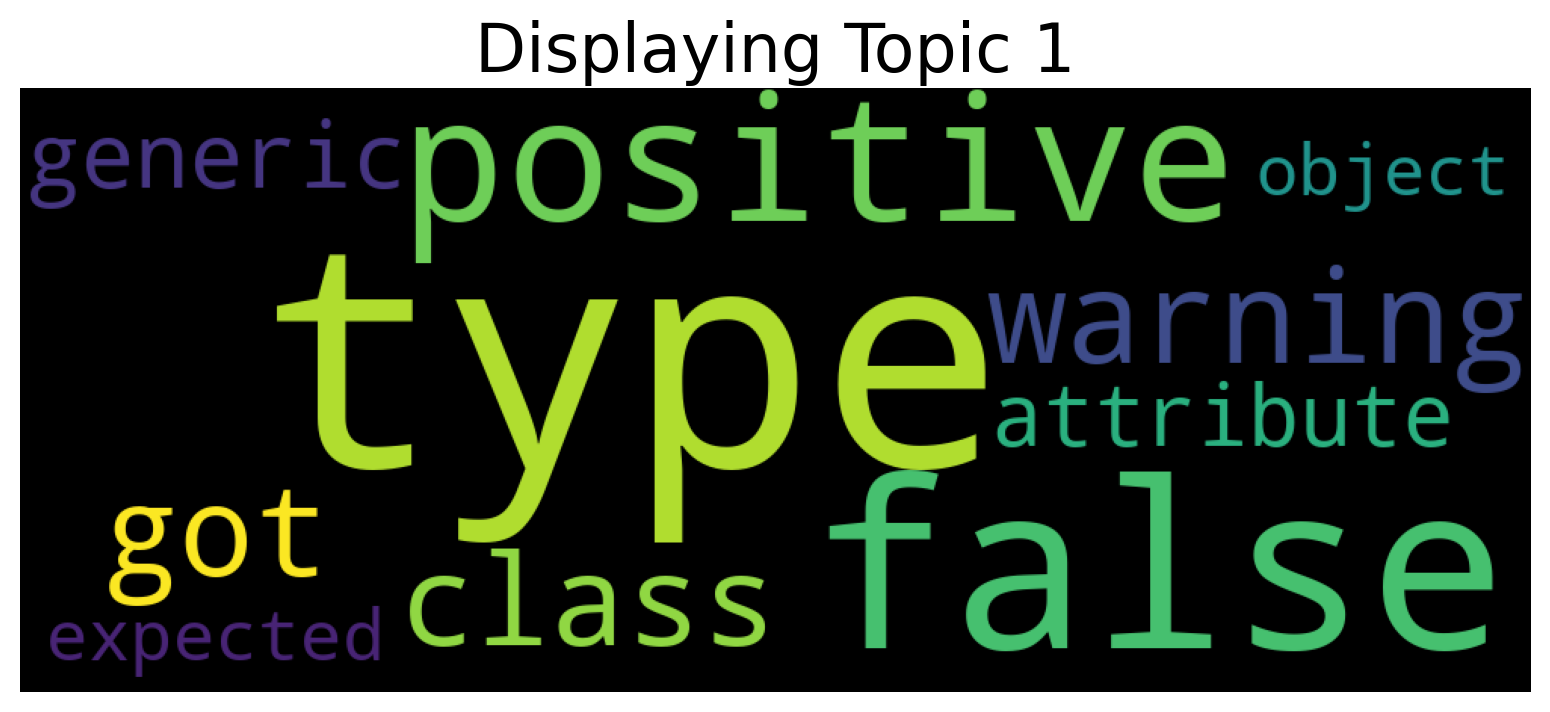

In [18]:
from tp.model_class import ModelCTM
model_tp=ModelCTM(topic_model_no_lemma, 768, 10, 5)
model_tp.fit(train_data_no_lemma)
model_tp.save_model("5_epoch_nothing")
model_tp.cloud()

Epoch: [5/5]	 Seen Samples: [110070/110070]	Train Loss: 61.86937786749341	Time: 0:00:10.908035: : 5it [00:55, 11.04s/it]
Sampling: [20/20]: : 20it [03:04,  9.24s/it]


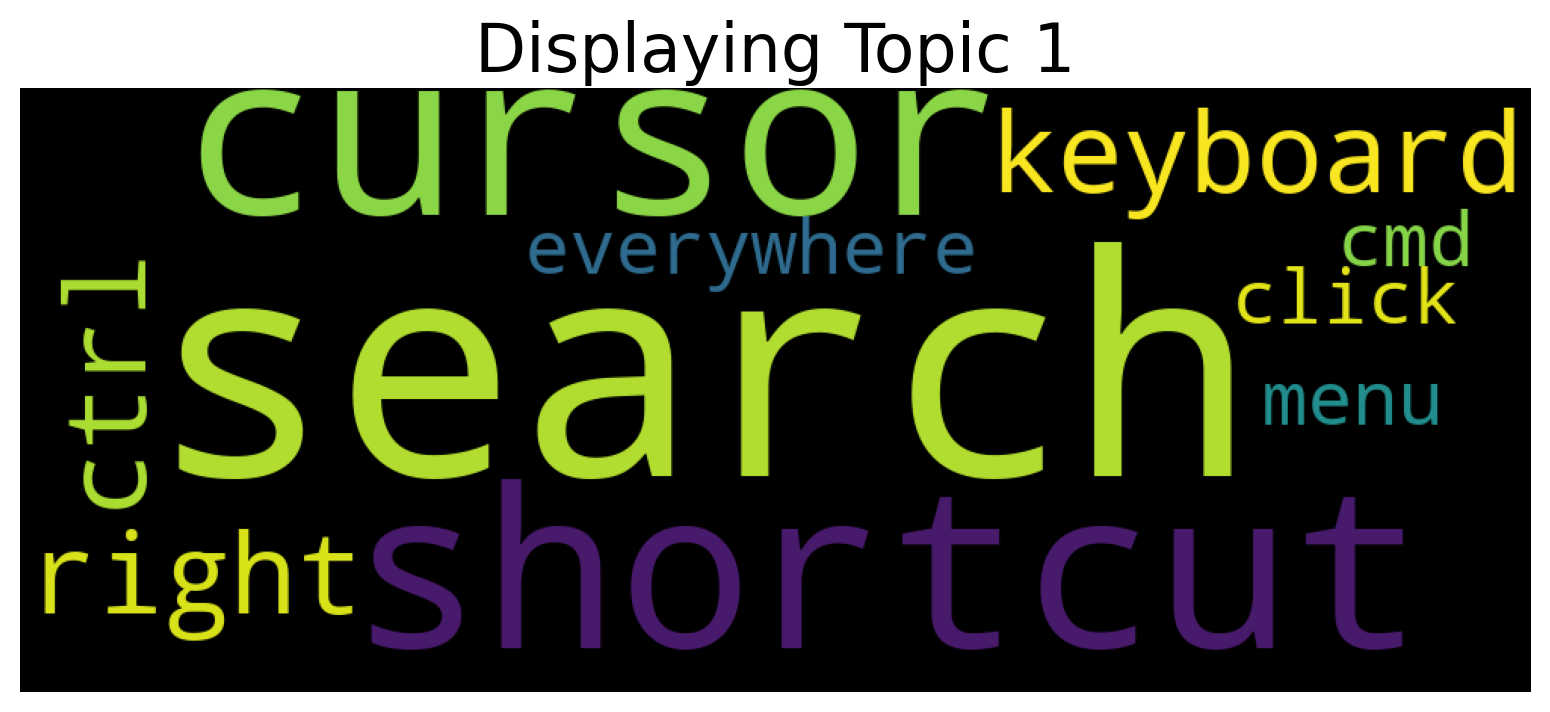

In [20]:
from tp.model_class import ModelCTM
model_tp=ModelCTM(topic_model, 768, 10, 5)
model_tp.fit(train_data)
model_tp.save_model("5_epoch_l")
model_tp.cloud()

Epoch: [5/5]	 Seen Samples: [110070/110070]	Train Loss: 52.3794168337301	Time: 0:00:11.431537: : 5it [00:56, 11.33s/it]
Sampling: [20/20]: : 20it [02:58,  8.94s/it]


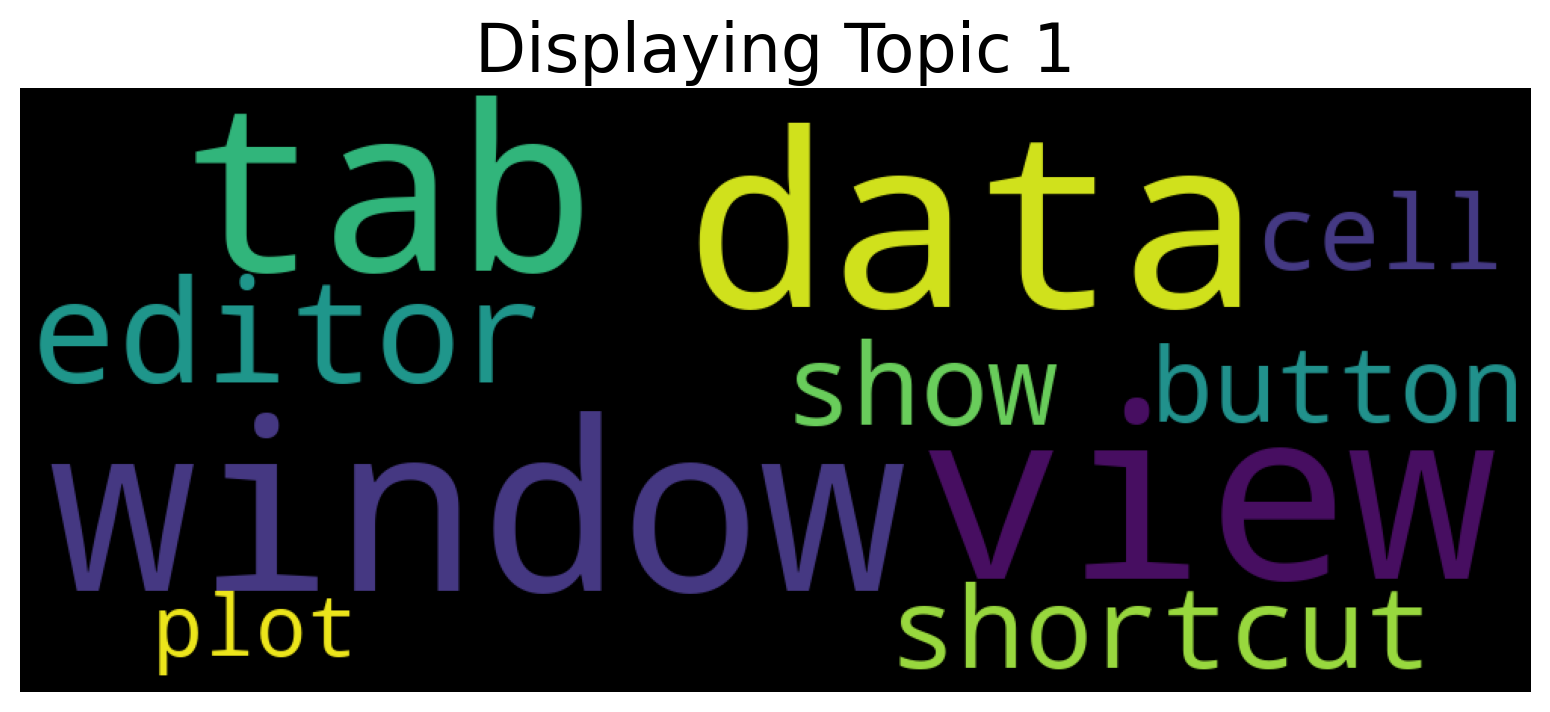

In [19]:
from tp.model_class import ModelCTM
model_tp=ModelCTM(topic_model_le, 768, 10, 5)
model_tp.fit(train_data_le)
model_tp.save_model("5_epoch_le")
model_tp.cloud()

- Убираем стоп-слова/ пунктуацию: Train Loss: 61.98972572097231
- Убираем стоп-слова/ леммантизация: Train Loss: 61.86937786749341
- Убираем стоп-слова/ леммантизация / оставляем только англйиские слова: Train Loss: 52.3794168337301

Попробовала посмотреть на разные топики, вариант с исключением не английских слов выглядит чище всего, и для интерпретации тоже больше подходит. 